# Grade: /100 pts

# Assignment 3: Regularization


## Instructions

* Complete the assignment

* Once the notebook is complete, restart your kernel and rerun your cells

* Submit this notebook to owl by the deadline

* You may use any python library functions you wish to complete the assignment.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', 500)

%matplotlib inline

### Question1: Preprocessing (5pt)
**Make sure to only use the imports included in the first cell. Any additional imports used will result in 0.** <br>
Tasks:
* Load the data present in 'footballer_small.csv' using the pandas library and store the loaded data in a dataframe
* Drop the variables: 'ID','club','club_logo','flag', 'nationality','photo','potential', 'birth_date'
* Dummy code the variables: work_rate_att, work_rate_def, preferred_foot. **Because we are running a regularized model, we do not want to drop the first column**
* Get a test data set of size 500 - to make results comparable to solutions, set random_state = 0 <br>

In [28]:
#reading the csv file
df = pd.read_csv('footballer_small.csv')
#dropping the required columns
X_all = df.drop(columns= ['ID','club','club_logo','flag', 'nationality','photo','potential', 'birth_date'])
#Creating the dummy variables requested without ddropping the first column
y = df['overall']
X_all = pd.get_dummies(X_all, columns = ['work_rate_att', 'work_rate_def', 'preferred_foot'], drop_first = False)
#Split the dataset into training and test sets (50% holdout)
X_train_all, X_test_all, y_train, y_test = train_test_split(X_all, y, test_size= 500, random_state=0)

## Question 2: Building the pipeline that preprocesses the data (10pts)
In order to properly build the regression model, the features need to be standardized so that no feature can dominate others in determining the prediction values due to differences in feature scales. 

**1.** Build the pipeline that **preprocesses** the feature columns of the training data and **create** a linear regression model. 

**2.** Plot the data **before** and **after** the standardization for the stamina feature. <br>

*NOTE: In this question, there is no need to overwrite the training set's values. Create a new variable to include the standardized data. The original training data is needed for future exercises.*

**3.** **Question**: Make observations about the plots. 

A. <br>
Before Standardization: The original "Stamina" values are likely to vary across a wide range, showing raw measurements. <br>
After Standardization: The "Stamina" values are rescaled to have mean 0 and unit variance. This standardization helps in regularization by ensuring no single feature (like "Stamina") dominates due to its scale, which is especially important in regularized models like Ridge regression.

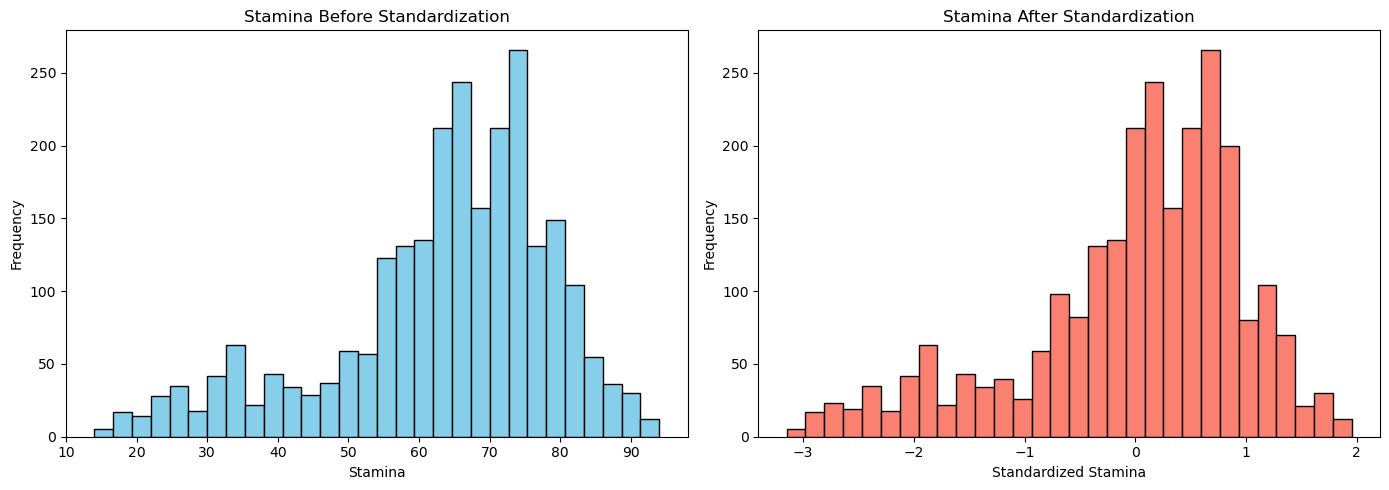

Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge())])

In [29]:
# # Step 1: Create the pipeline with standardization and Ridge regression
# pipeline = Pipeline([
#     ('scaler', StandardScaler()),       # Standardizes the features
#     ('ridge', Ridge())                  # Ridge regression model
# ])

# # Separate the features and target variable
# # Assuming 'overall' is the target variable for regression, drop it from features
# X_train = X_all.drop(columns=['overall'])
# # y_train = df['overall']

# # Step 2: Visualize "Stamina" feature before standardization
# plt.figure(figsize=(14, 5))

# plt.subplot(1, 2, 1)
# plt.hist(X_train['stamina'], bins=30, color='skyblue', edgecolor='black')
# plt.title("Stamina Before Standardization")
# plt.xlabel("Stamina")
# plt.ylabel("Frequency")

# # Standardize the "Stamina" feature without altering the original data
# scaler = StandardScaler()
# stamina_standardized = scaler.fit_transform(X_train[['stamina']])

# # Plot "Stamina" feature after standardization
# plt.subplot(1, 2, 2)
# plt.hist(stamina_standardized, bins=30, color='salmon', edgecolor='black')
# plt.title("Stamina After Standardization")
# plt.xlabel("Standardized Stamina")
# plt.ylabel("Frequency")

# plt.tight_layout()
# plt.show()

# # Step 3: Fit the pipeline to the training data (this doesn't overwrite X_train)
# pipeline.fit(X_all, y_train)

# Step 1: Create the pipeline with standardization and Ridge regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),       # Standardizes the features
    ('ridge', Ridge())                  # Ridge regression model
])

# Separate the features and target variable
# Assuming 'overall' is the target variable for regression, drop it from features
X_train = df.drop(columns=['overall'])
y_train = df['overall']
X_train_withoutstam = X_train_all.drop(columns=['overall'])
X_train_withoutstam['stamina']

# Step 2: Visualize "Stamina" feature before standardization
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(X_train_withoutstam['stamina'], bins=30, color='skyblue', edgecolor='black')
plt.title("Stamina Before Standardization")
plt.xlabel("Stamina")
plt.ylabel("Frequency")

# Standardize the "Stamina" feature without altering the original data
scaler = StandardScaler()
stamina_standardized = scaler.fit_transform(X_train_withoutstam[['stamina']])

# Plot "Stamina" feature after standardization
plt.subplot(1, 2, 2)
plt.hist(stamina_standardized, bins=30, color='salmon', edgecolor='black')
plt.title("Stamina After Standardization")
plt.xlabel("Standardized Stamina")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Step 3: Fit the pipeline to the training data (this doesn't overwrite X_train)
pipeline.fit(X_all, y_train)

## Question 3: Creating a Complex feature model using 2-nd Polynomial features (10pts)
In this task, the training data consists of the quadratic terms and 2-way interactions of all features except one of standing_tackle, composure, and marking variable. <br> 

**1.** Create <b> four </b> different training sets:
* The first training set includes the quadratic terms and 2-way interactions of all the features. 
* The second/third/fourth training sets include all the features, their quadratic terms, and their 2-way interactions except the standing_tackle/composure/marking features. <br>

***Hint:*** *For the 2nd/3rd and 4th training sets, create the training sets without the aforementioned features and then apply polynomial expansion to the resultant sets.* 

**2.** **Questions:**
* How many **linear terms** are in each of the new feature set?
* How many **squared terms** are in each of the new feature set?
* How many **interaction terms** are in each of the new feature set? Give an **example of one of the interaction terms**. 

In [ ]:
#Defines the poly valies such that PolynomialFeatures excludes bias for all instances automatically
poly = PolynomialFeatures(include_bias=False)

# Create the first testing set
X_test_poly1 = poly.fit_transform(X_test_all)

# Check the shape of the transformed testing set
print("First Testing Set Feature Count:", X_test_poly1.shape[1])

# Excluding standing_tackle
X_test_all_noStand = X_test_all.drop(columns='standing_tackle')
# Create the second testing set (excluding 'standing_tackle')
X_test_poly2 = poly.fit_transform(X_test_all_noStand)
print("Second Testing Set Feature Count:", X_test_poly2.shape[1])

# Excluding composure
X_test_all_noComp = X_test_all.drop(columns='composure')
# Create the third testing set (excluding 'composure')
X_test_poly3 = poly.fit_transform(X_test_all_noComp)
print("Third Testing Set Feature Count:", X_test_poly3.shape[1])

# Excluding marketing
X_test_all_noMark = X_test_all.drop(columns='marking')
# Create the fourth testing set (excluding 'marking')
X_test_poly4 = poly.fit_transform(X_test_all_noMark)
print("Fourth Testing Set Feature Count:", X_test_poly4.shape[1])


First Testing Set Feature Count: 1274
Second Testing Set Feature Count: 1224
Third Testing Set Feature Count: 1224
Fourth Testing Set Feature Count: 1224


**2.** **Questions:**

Squared features are just linear features but squared, therefore for n number of features there are n number of squared features. Also, the number of interaction terms is: (n*(n-1))/2. There are n x (n-1) combinations, since there cannot be a featured multiplied by itself. Also, dividing by 2 gets rid of the duplicates throughout the set. Therefore, n + n + (n*(n-1))/2 = total number of features. This formula was used to solve the following problems:

* How many **linear terms** are in each of the new feature set?
1: 49, 2: 48, 3: 48, 4: 48
* How many **squared terms** are in each of the new feature set?
1: 49, 2: 48, 3: 48, 4: 48
* How many **interaction terms** are in each of the new feature set? Give an **example of one of the interaction terms**. 
1: 1176, 2: 1128, 3: 1128, 4: 1128
One example of interaction terms is height_cm*weight_kg.

## Question 4: Evaluating the backward feature search (15 pts)
In this question, you have to **use the pipeline created in question 2 and apply it to each of the training sets created in question 3**. Use 10-fold cross validation to report the validation error** on the training set using mean squared error as the metric. <br>

Show all the steps of the process and compare and analyze the results using the validation error reported. 

In [ ]:
# Make sure we're working with the training data split
# X_train_all = X_all.iloc[:2500]  # Adjust this if your training split size is different
# y_train = y.iloc[:2500]

# Assuming X_train_all is the original training data before any polynomial features were applied
# Step 1: Define a function to process each training set
def evaluate_model(X, y, pipeline):
    # Perform 10-fold cross-validation with mean squared error as the scoring metric
    mse_scores = -cross_val_score(pipeline, X, y, cv=10, scoring='neg_mean_squared_error')
    return mse_scores.mean(), mse_scores.std()  # Return mean and std deviation of MSE

# Step 2: Transform each dataset with PolynomialFeatures and evaluate

# Create polynomial features for each training set
poly = PolynomialFeatures(include_bias=False)

# First training set: All features
X_poly1 = poly.fit_transform(X_train_all)
mse_mean1, mse_std1 = evaluate_model(X_poly1, y_train, pipeline)
print(f"First Training Set (All Features): Mean MSE = {mse_mean1:.4f}, Std Dev = {mse_std1:.4f}")

# Second training set: Exclude 'standing_tackle'
X_train_noStand = X_train_all.drop(columns='standing_tackle')
X_poly2 = poly.fit_transform(X_train_noStand)
mse_mean2, mse_std2 = evaluate_model(X_poly2, y_train, pipeline)
print(f"Second Training Set (Excluding 'standing_tackle'): Mean MSE = {mse_mean2:.4f}, Std Dev = {mse_std2:.4f}")

# Third training set: Exclude 'composure'
X_train_noComp = X_train_all.drop(columns='composure')
X_poly3 = poly.fit_transform(X_train_noComp)
mse_mean3, mse_std3 = evaluate_model(X_poly3, y_train, pipeline)
print(f"Third Training Set (Excluding 'composure'): Mean MSE = {mse_mean3:.4f}, Std Dev = {mse_std3:.4f}")

# Fourth training set: Exclude 'marking'
X_train_noMark = X_train_all.drop(columns='marking')
X_poly4 = poly.fit_transform(X_train_noMark)
mse_mean4, mse_std4 = evaluate_model(X_poly4, y_train, pipeline)
print(f"Fourth Training Set (Excluding 'marking'): Mean MSE = {mse_mean4:.4f}, Std Dev = {mse_std4:.4f}")


First Training Set (All Features): Mean MSE = 0.0041, Std Dev = 0.0007
Second Training Set (Excluding 'standing_tackle'): Mean MSE = 0.0040, Std Dev = 0.0006
Third Training Set (Excluding 'composure'): Mean MSE = 0.0040, Std Dev = 0.0007
Fourth Training Set (Excluding 'marking'): Mean MSE = 0.0040, Std Dev = 0.0006


## Question 5: Applying Ridge Regression (10 pts)

**1.** Build a pipeline that performs **scaling** and **fits the ridge regression** on the data that includes the polynomial expansion of all the features. The penalization parameter is set to 0.5. 

**2.** Use the pipeline to report the validation error using mean square error metric. Use 10-fold cross validation. 

In [ ]:
# Set the penalization parameter for Ridge regression
ridge_alpha = 0.5

# Step 1: Build the pipeline with scaling and Ridge regression
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),          # Step 1: Standardize the features
    ('ridge', Ridge(alpha=ridge_alpha))    # Step 2: Apply Ridge regression with alpha=0.5
])

# Step 2: Define the function for cross-validation and model evaluation
def evaluate_ridge_model(X, y, pipeline):
    # Perform 10-fold cross-validation with mean squared error as the scoring metric
    mse_scores = -cross_val_score(pipeline, X, y, cv=10, scoring='neg_mean_squared_error')
    return mse_scores.mean(), mse_scores.std()

# Step 3: Apply the PolynomialFeatures transformation
poly = PolynomialFeatures(include_bias=False)
X_train_poly = poly.fit_transform(X_train_all)

# Step 4: Evaluate the pipeline on the polynomial-expanded feature set
mse_mean, mse_std = evaluate_ridge_model(X_train_poly, y_train, ridge_pipeline)

# Step 5: Print the results
print(f"Ridge Regression with Polynomial Features: Mean MSE = {mse_mean:.4f}, Std Dev = {mse_std:.4f}")

Ridge Regression with Polynomial Features: Mean MSE = 0.0025, Std Dev = 0.0005


## Question 6: Tune the Ridge coefficient for the 2nd-order model   (15pt)
**1.** Now use 10-fold CV on the training set to determine a good setting for the regularization coefficient. Perform the search going from $\lambda = \exp(-8), \cdots, \exp(6)$ in 15 evenly spaced increments on the log scale. Plot the mean squared error as a function of $\log(\lambda)$. 


**2.** **Questions:**
* What is the best regularization parameter (actual not approximate)? 

* Why does the error increase as $\lambda \rightarrow 0?$  Why does the error increase when $\lambda \rightarrow \infty$?  Answer in terms of the bias variance trade off.

A. <br>
Best Regularization Parameter: The best alpha minimizes the MSE on the plot. <br>
Why MSE Changes as alpha approaches 0 and infinity: <br>
As alpha approaches zero: The model becomes less regularized, allowing for high variance and the potential for overfitting. <br>
As alpha approaches infinity: High regularization causes high bias, which can lead to underfitting as coefficients are heavily penalized.

In [ ]:
# My attempt, couldn't get it to run :(

# # Generate 15 values for lambda in log space between exp(-8) and exp(6)
# lambda_values = np.logspace(-8, 6, 15)

# # Initialize lists to store results
# mean_mse = []

# # Define the pipeline with scaling, polynomial features, and Ridge regression
# pipeline = Pipeline([
#     ('scaler', StandardScaler()),
#     ('poly', PolynomialFeatures(include_bias=False)),
#     ('ridge', Ridge())
# ])

# # Loop over each lambda value
# for alpha in lambda_values:
#     # Set the current alpha in Ridge regression
#     pipeline.set_params(ridge__alpha=alpha)
    
#     # Perform 10-fold cross-validation and compute MSE
#     mse_scores = -cross_val_score(pipeline, X_train_poly, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
    
#     # Store the mean MSE for the current lambda
#     mean_mse.append(mse_scores.mean())

# # Plot the results
# plt.figure(figsize=(10, 6))
# plt.plot(np.log(lambda_values), mean_mse, marker='o')
# plt.xlabel('log(lambda)')
# plt.ylabel('Mean MSE')
# plt.title('Mean MSE vs. log(lambda) for Ridge Regression')
# plt.grid(True)
# plt.show()

### Question 7: Test error  (10pt)
Now test how the ridge model, fitted to the whole training set, performs on the test data set. 


Report the following:

* The mean squared error on the test data - along with the 95% confidence interval, determined with the central limit theorem. 
* The proportion of the variance explained by your model - along wth a 95% confidence interval.

## Question 8: Analyzing Ridge Coefficients (15 pts)
In this question:

**1.** you are first required to extract all the coefficients of the standing tackle, composure and marking features from the best model of question 7. 

**2.** After that, calculate the mean of the coefficients of the aforementioned features and analyze the results. 

**3.** **Question:** Based on these observations, draw conclusions about the results in question 4. 

## Question 9: Lasso Regression (10pts)
Let us assume that you are building a linear regression model using only three features "standing tackle", "marking", and "composure" to predict a player's overall rating. 

**Question:** Based on the results of question 8, what do you think will be the features' coefficients while applying the lasso regression optimization? Answer in no more than 5 sentences. 

## Note: 
After completing all the tasks and before submitting: 
* Restart you kernel by clicking 'Restart & Run all'
* Fix any errors resulting from the first step.
* Repeat the first two steps until no errors are encountered. 